In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [168]:
#Loading data, overviewing and data cleaning
df=pd.read_csv('train.csv')
df = shuffle(df) #Good Data scientist shuffle the data before using it :)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 463 to 974
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  Overall

In [170]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
463,464,70,RL,74.0,11988,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,188700
255,256,60,RL,66.0,8738,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Normal,230000
1087,1088,60,FV,85.0,10574,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,252000
1371,1372,80,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,165500
284,285,120,RL,50.0,8012,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,179200


In [171]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [172]:
df.shape

(1460, 81)

<AxesSubplot:>

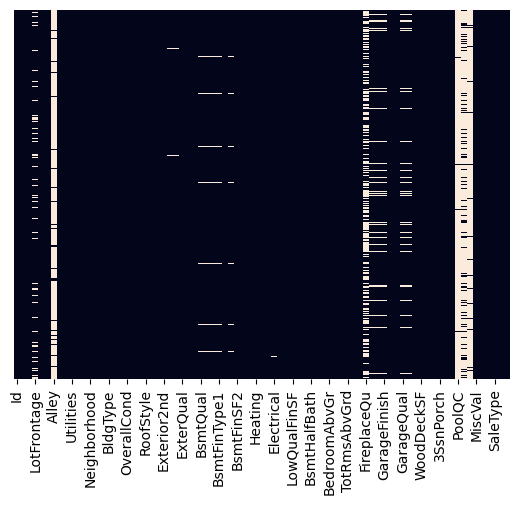

In [173]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [174]:
df.drop(['Alley'],axis=1,inplace=True)
df.drop(['GarageYrBlt'],axis=1,inplace=True)
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df.drop(['Id'],axis=1,inplace=True)

In [175]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])


df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

<AxesSubplot:>

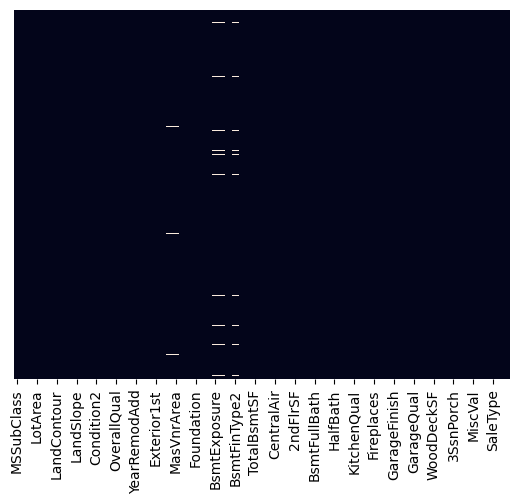

In [176]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [177]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

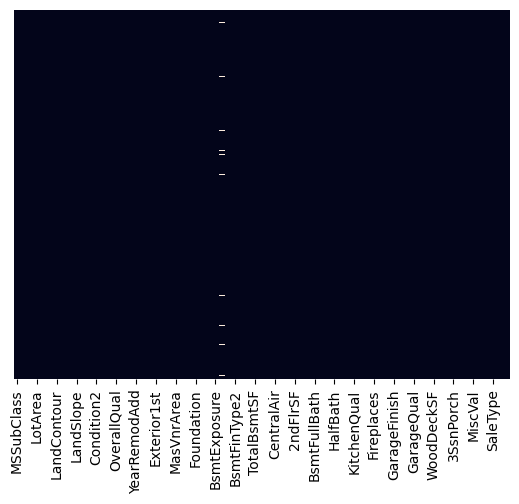

In [178]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [179]:
df.dropna(inplace=True)

<AxesSubplot:>

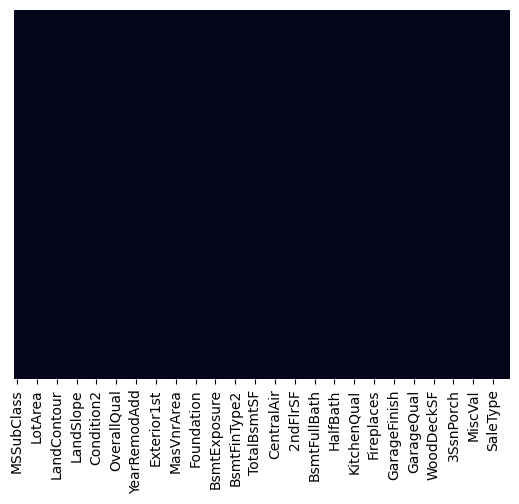

In [180]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [181]:
df = df.apply(lambda col: pd.factorize(col)[0])

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 463 to 974
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1422 non-null   int64
 1   MSZoning       1422 non-null   int64
 2   LotFrontage    1422 non-null   int64
 3   LotArea        1422 non-null   int64
 4   Street         1422 non-null   int64
 5   LotShape       1422 non-null   int64
 6   LandContour    1422 non-null   int64
 7   Utilities      1422 non-null   int64
 8   LotConfig      1422 non-null   int64
 9   LandSlope      1422 non-null   int64
 10  Neighborhood   1422 non-null   int64
 11  Condition1     1422 non-null   int64
 12  Condition2     1422 non-null   int64
 13  BldgType       1422 non-null   int64
 14  HouseStyle     1422 non-null   int64
 15  OverallQual    1422 non-null   int64
 16  OverallCond    1422 non-null   int64
 17  YearBuilt      1422 non-null   int64
 18  YearRemodAdd   1422 non-null   int64
 19  RoofS

<Figure size 2000x2000 with 0 Axes>

<AxesSubplot:>

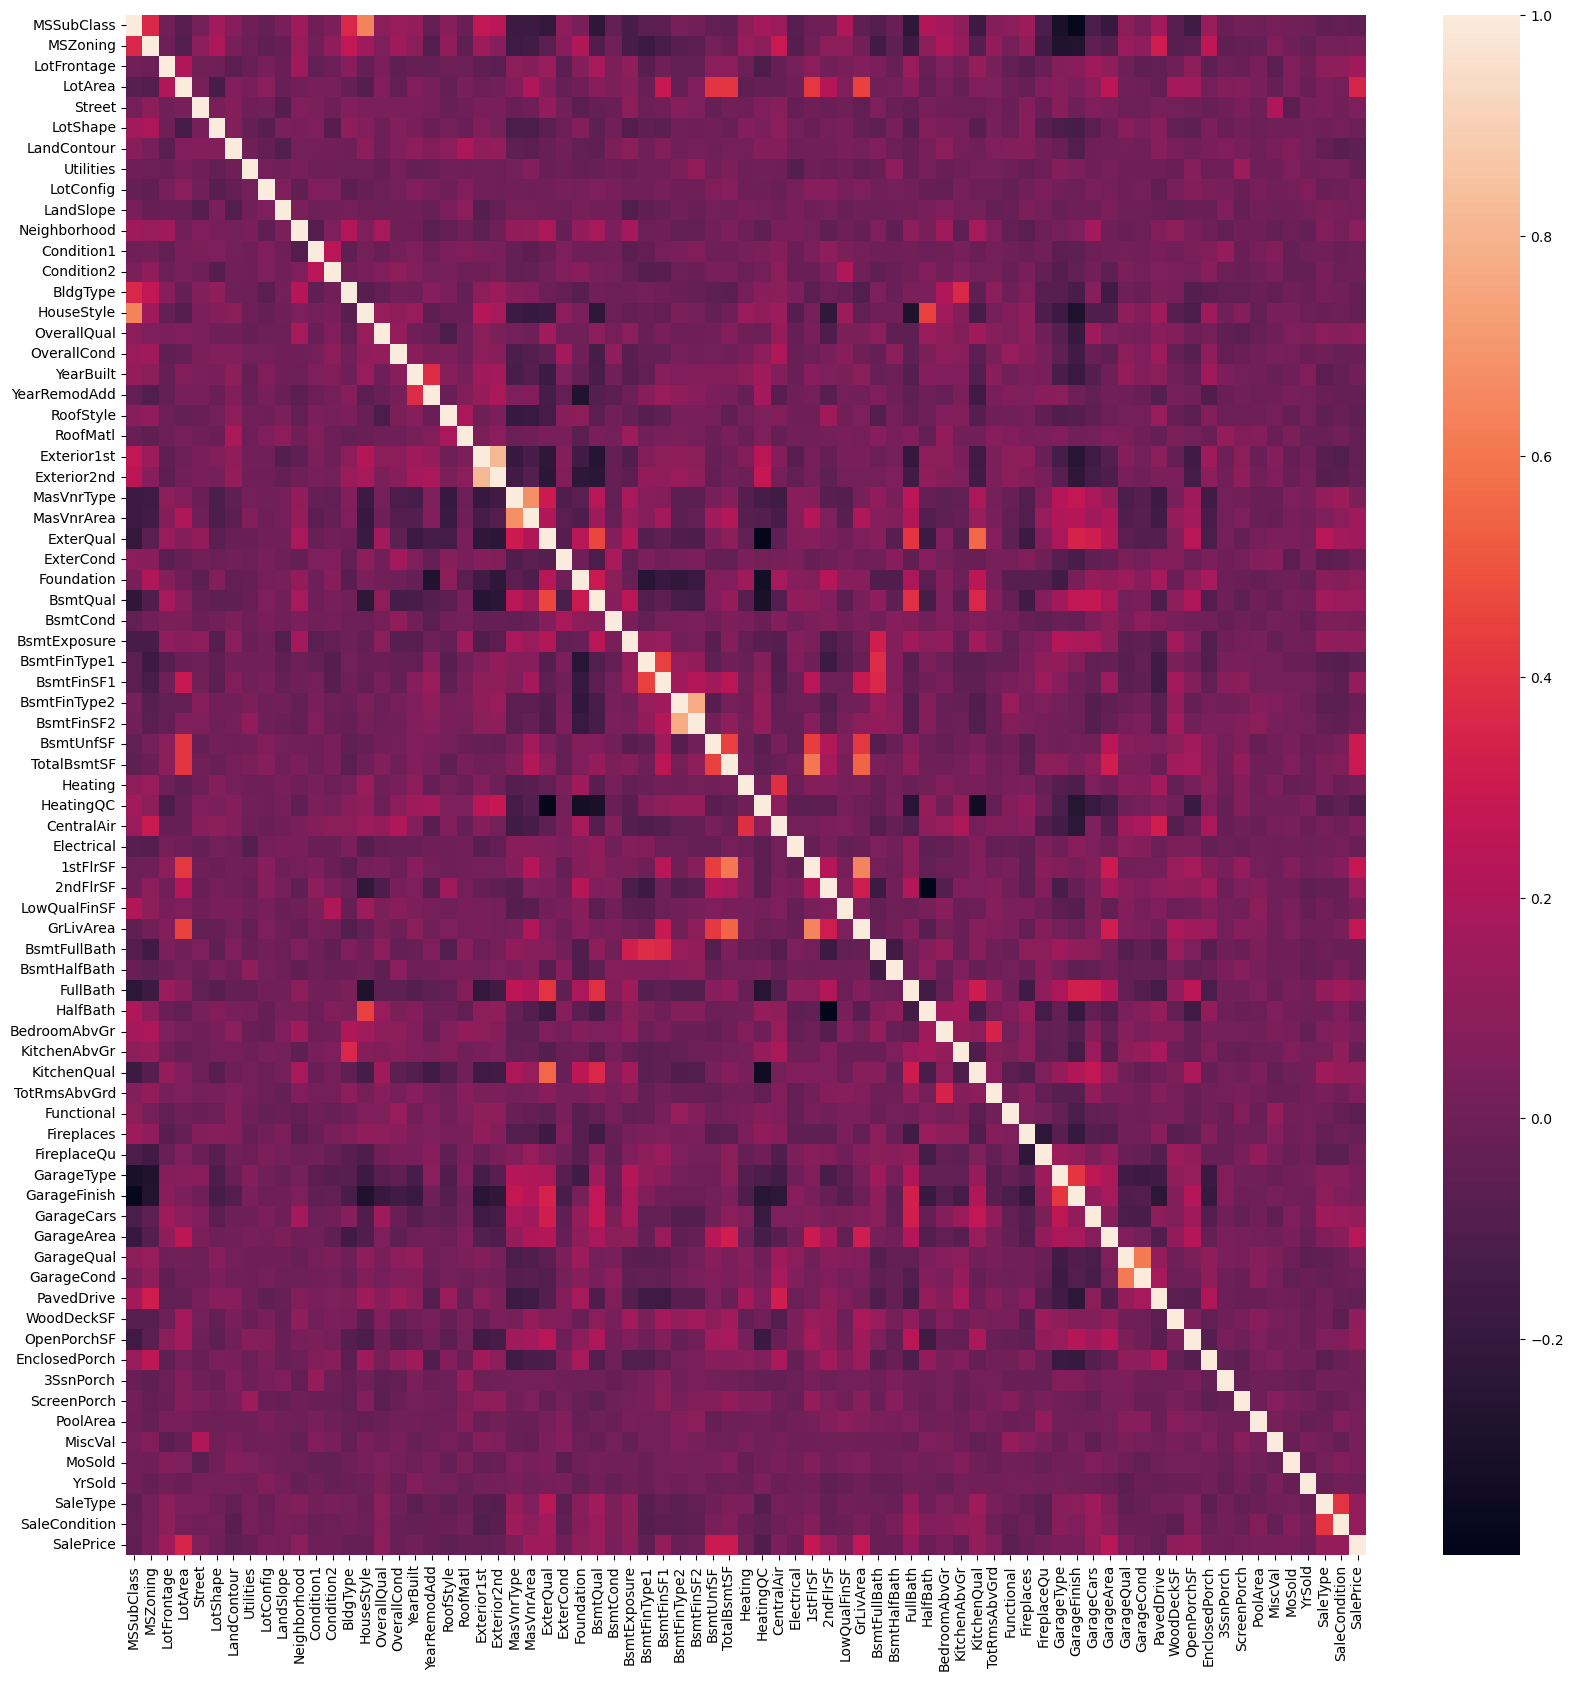

In [183]:
#Finding the most correlated variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [184]:
listMostCorrelated = list(df.corr()
        ["SalePrice"][(abs(df.corr()["SalePrice"]>0.30))].index)
listMostCorrelated

['LotArea', 'BsmtUnfSF', 'SalePrice']

In [185]:
clean_df = df[df.columns.intersection(listMostCorrelated)]
clean_df.head()

,LotArea,BsmtUnfSF,SalePrice
463,0,0,0
255,1,1,1
1087,2,2,2
1371,3,3,3
284,4,4,4


In [186]:
#Preparing training and test sets

X=clean_df.drop(['SalePrice'],axis=1)
y=clean_df['SalePrice']

X = pd.DataFrame(StandardScaler().fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [194]:
def draw_pred_vs_actual(pred, y_test):
    plt.figure(figsize=(10,10))
    plt.scatter(y_test, pred, c='crimson')
    plt.yscale('log')
    plt.xscale('log')
    p1 = max(max(pred), max(y_test))
    p2 = min(min(pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()

In [187]:
#SVR
svr=SVR(C=100)
svr.fit(X_train,y_train)
pred=svr.predict(X_test)

SVR(C=100)

In [188]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,pred)

print("r2=",r2)
print("mae=",mae)
print("mse=",mse)
print("rmse=",rmse)

r2= 0.11152738578925159
mae= 130.37535329787252
mse= 28807.53725205005
rmse= 169.72783287383967


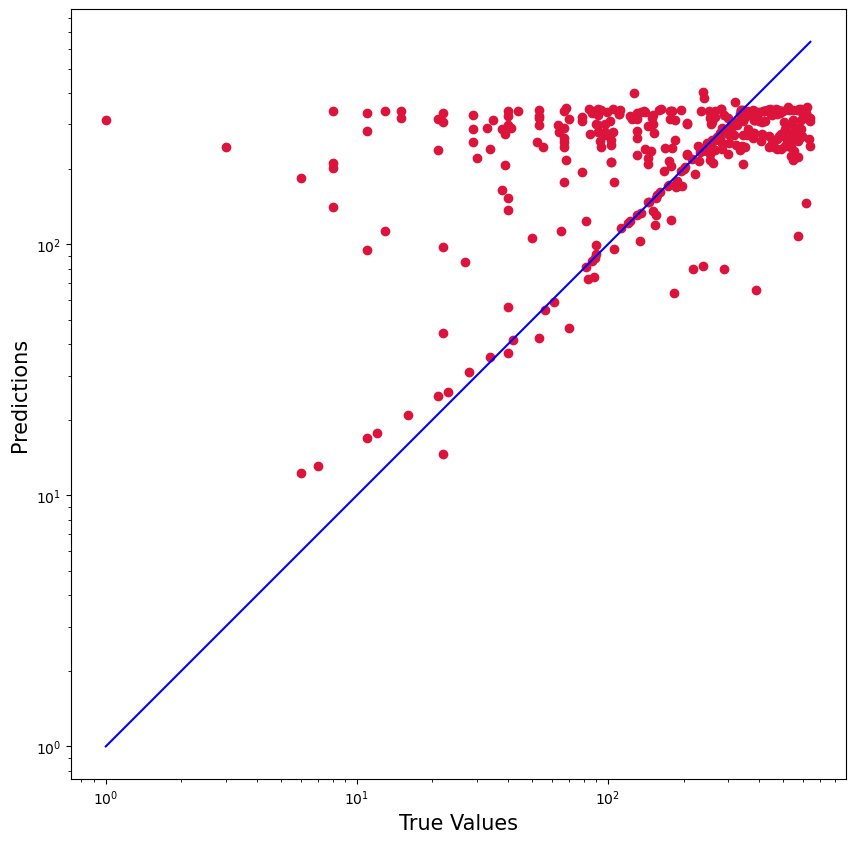

In [189]:
draw_pred_vs_actual(pred, y_test)

In [197]:
#PF
poly = PolynomialFeatures(degree=2)
X_train_2d = poly.fit_transform(X_train)
X_test_2d = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_2d, y_train)
pred = lr.predict(X_test_2d)

LinearRegression()

In [198]:
mae = mean_absolute_error(y_test,pred)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test,pred)

print("r2=", r2)
print("mae=", mae)
print("mse=", mse)
print("rmse=", rmse)

r2= 0.14566910844793046
mae= 135.9373401714552
mse= 27700.537518341032
rmse= 166.4347845804507


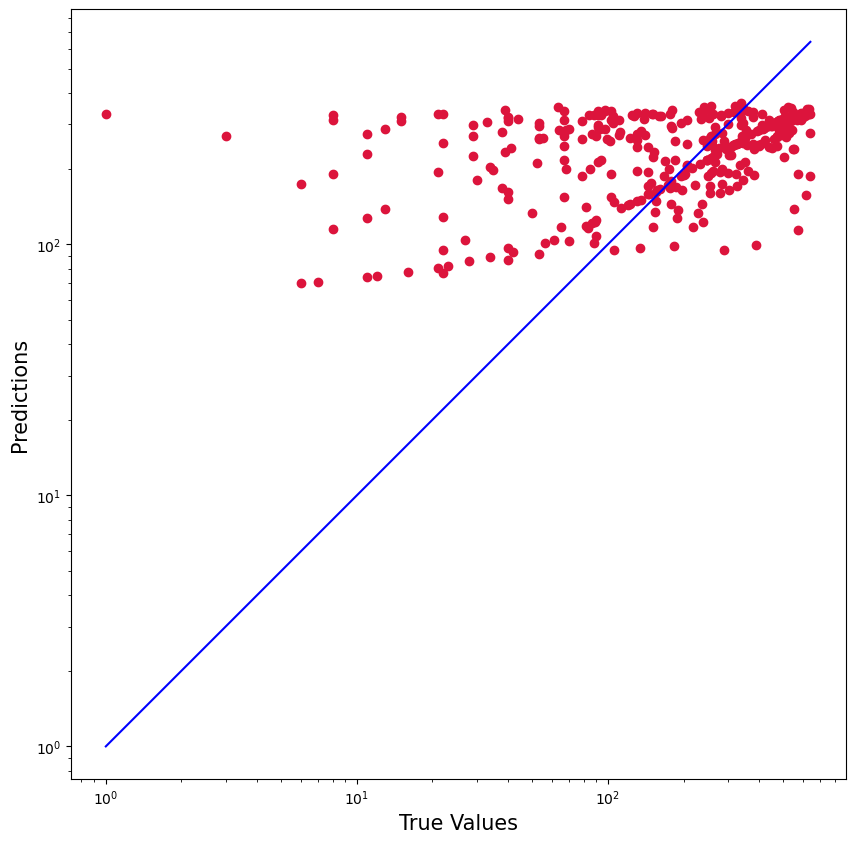

In [199]:
draw_pred_vs_actual(pred, y_test)

In [208]:
df_test=pd.read_csv('test.csv')
df_test_clean = df_test[df_test.columns.intersection(listMostCorrelated)]
df_test_clean = df_test_clean.apply(lambda col: pd.factorize(col)[0])
pred_test=svr.predict(df_test_clean)

C:\Users\Ramon\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [209]:
output = pd.DataFrame({'Id': df_test.Id, 'SalePrice': pred_test})
output.to_csv('submission.csv', index=False)